In [1]:
# Decision Tree
# 라벨 인코딩 : 남녀 >> 01 문제 : 크기를 갖게 됨( 크기를 가져도 되면 상관 없으나 영향을 미칠 경우)
# One-hot 모델 사용

## Decision Tree(결정 트리)
- Tree를 만들기 위해 예/아니오 질문을 반복하며 학습한다.
- 분류와 회귀에 모두 사용 가능
- 데이터를 Tree구조로 만드는 것이 힘듦 >> But. 함수가 알아서 다 만들어 줌
- 최종 결론 값 근처의 값들의 평균을 내면 회귀 모델이 됨
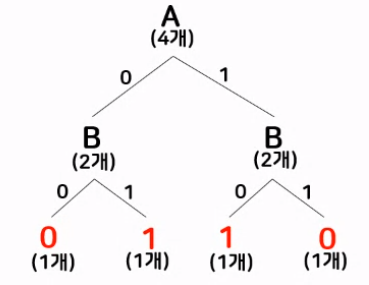
- 의사결정 트리는 설계 전에 정확한 목적이 필요(동물, 분류 등)
- 트리 분류 조건은 가장 중요한 특성을 대상으로 조건을 부여

#### 장점
- 논리 값으로 따지기(기준으로 쪼개기) 때문에 데이터 값의 크기, 분산, 평균에서 크게 벗어난 튀어나온 값들에 영향을 받지 않는다.

#### 단점
- 대각선 형태로 쪼개져 있는 데이터는 쪼개기 어려움

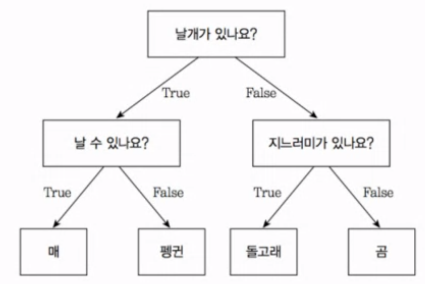
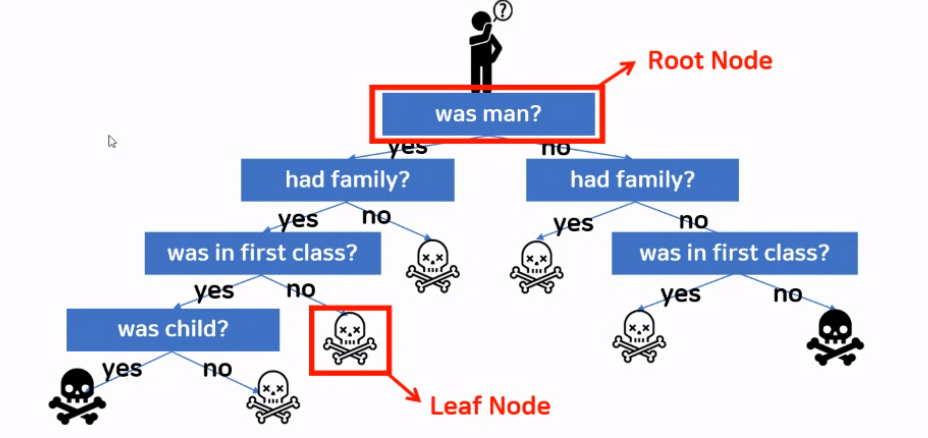
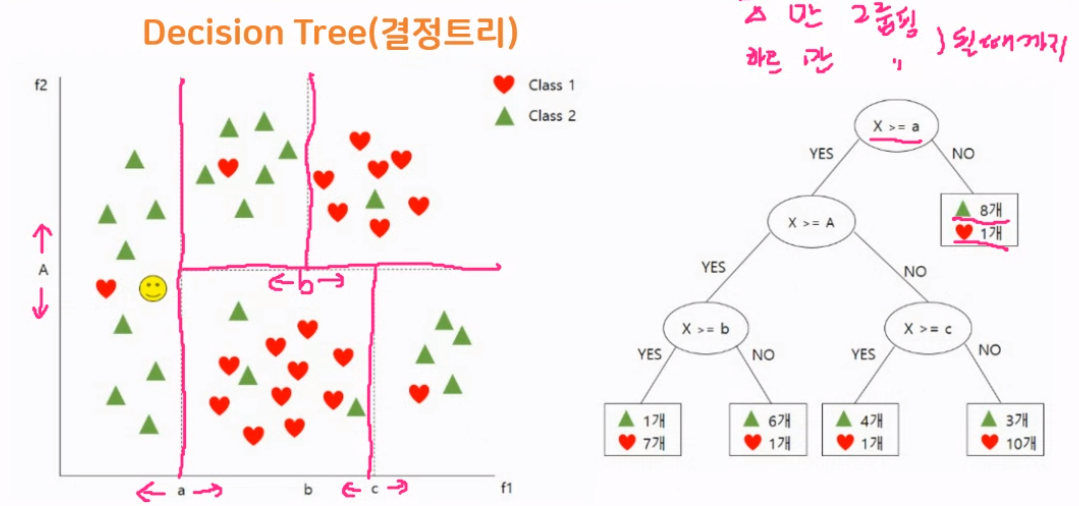
- pure node(순수한 노드)가 될때까지 하트는 하트끼리, 세모는 세모끼리 있도록 트리를 나눠나감

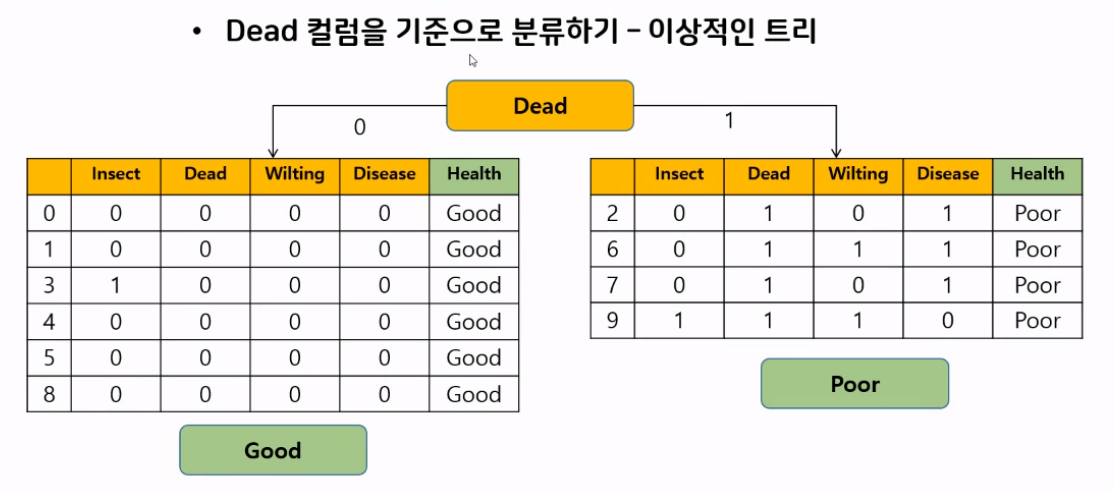
- Dead 특성과 Health 라벨에 공선성이 있으므로
- Dead 특성을 제거 혹은 처리
- 혹은 이런 특성은 제일 마지막에 사용하면 좋음
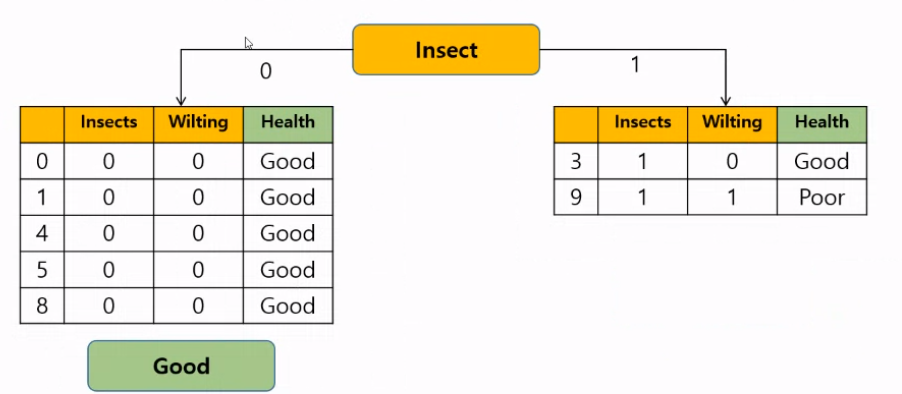
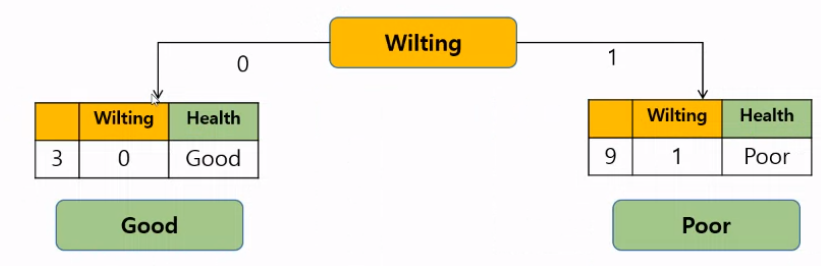
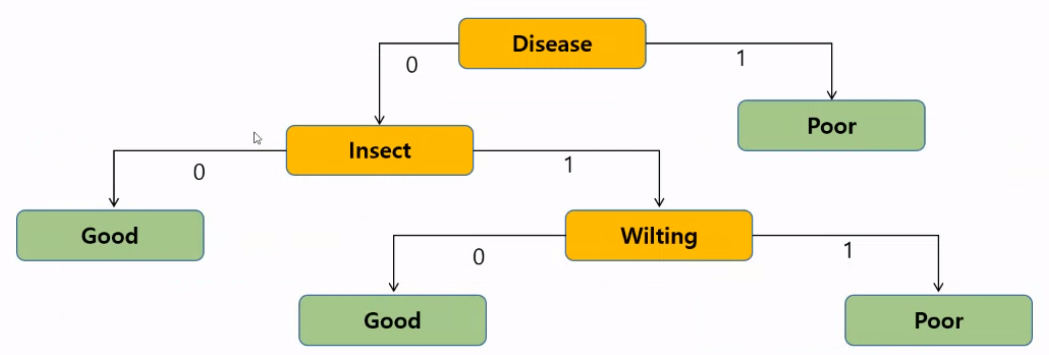

## Gini Impurity(지니 불순도)
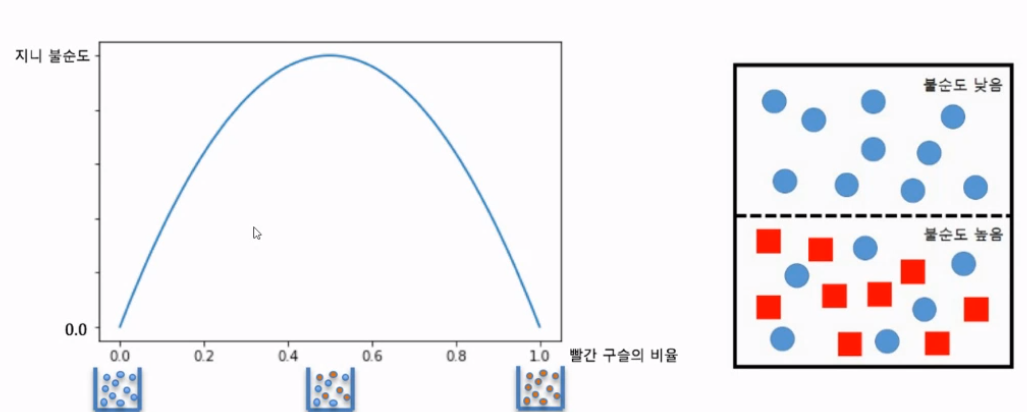
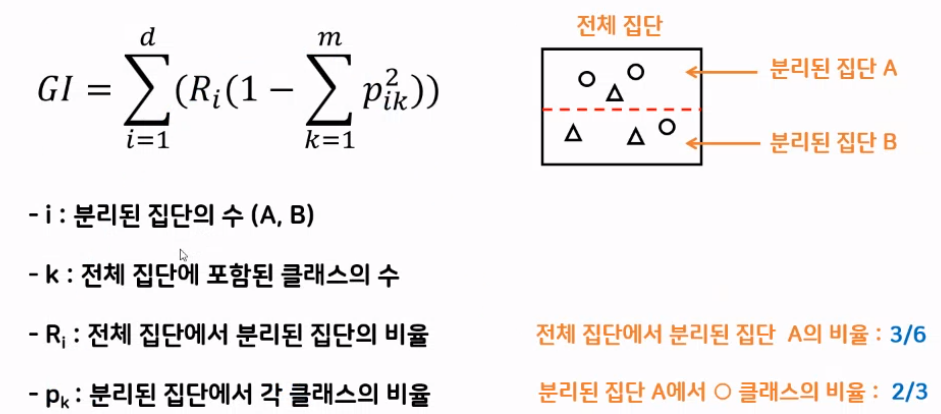
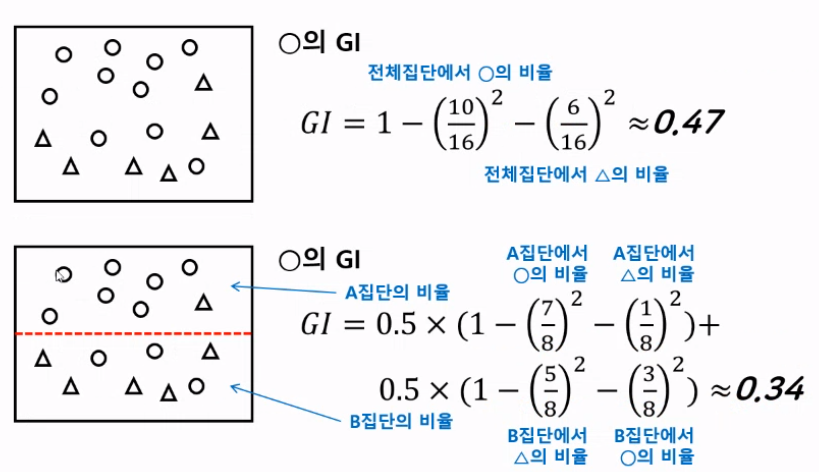
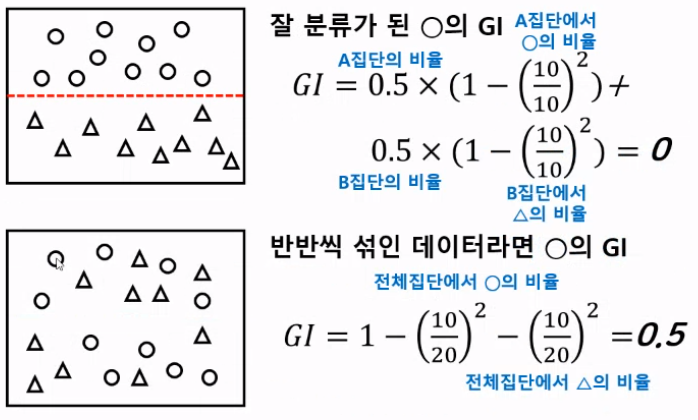
- 0.5가 가장 높은 불순도 값
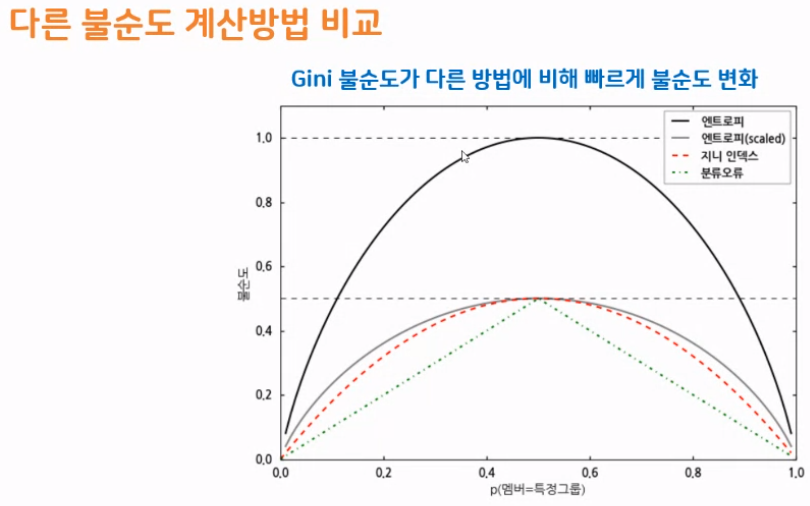
- 분류 오류는 특성을 잘 반영 못하고 지나가 버리기 때문에 그다음인 지니 불순도 이용

- 순수 노드 : 타깃 값이 한 개인 리프 노드
- 모든 노드가 순수 노드가 될 때까지 학습 >> 복잡, 과대적합의 위험이 존재
- 새로운 데이터 포인트가 들어오면 해당하는 노드를 찾아 분류라면 더 많은 클래스를 선택하고 회귀라면 평균을 구함

### Decision Tree(결정 트리) 과대적합 제어
- 노드 생성을 미리 중단하는 사전 가지치기(pre-pruning)와 트리를 만든 후에 크기가 작은 노드를 삭제하는 사후 가지치기(post-pruning)가 있다(sklearn은 사전 가지치기만 지원)
- 사전 가지치기 : Tree를 만들기 전, 가지 치기
- 사후 가지치기 : Tree를 만든 후에 가지치기
- 가지치기를 한 데이터는 : 위쪽 노드로 올려줌
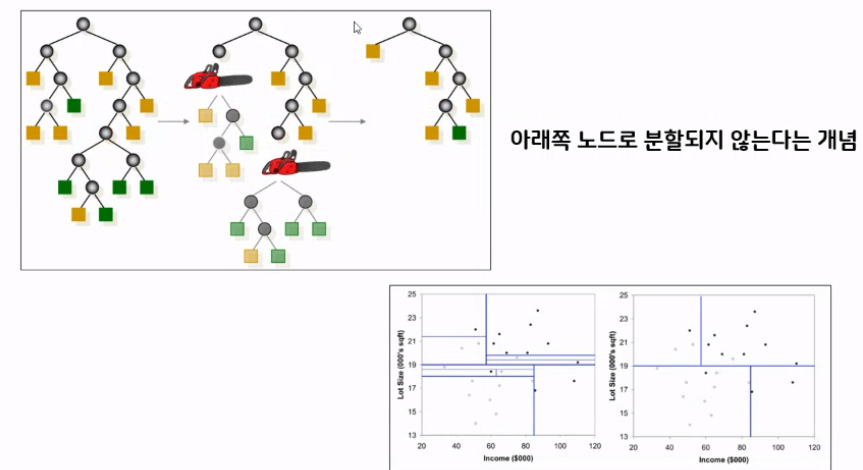
#### 트리의 크기를 결정짓는 방법
- 트리의 최대 깊이나 리프 노드의 최대 개수를 제어(max_depth, max_leaf_nodes)
- 노드가 분할하기 위한 데이터 포인트의 최소 개수를 지정(min_sample_split)
- 3개 중 하나만 사용! (겹칠 수 있기 때문에)

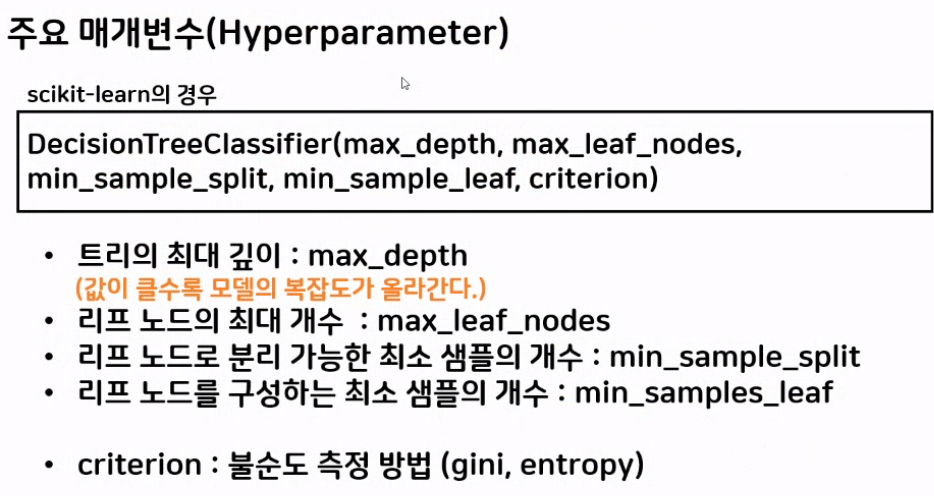
- 조건을 충족하지 않을 시, 가지치기, 위쪽 노드로 붙임
- 트리의 최대 깊이, 노드의 최대 개수, 노드의 분리 가능한 최소 샘플 수 까지만 사용(마지막은 너무 느려서 많이 사용x)

# 1. 문제 정의 
- 버섯의 특성 데이터를 이용해서 독버섯인지 식용버섯인지 분류하는 모델을 만들자
- 의사결정트리를 시각화 해보자!
- 라벨인코딩, 원핫인코딩

# Mushroom 데이터셋
- 8124개의 버섯 종류 데이터
- 22개의 특징(18개의 버섯 특징 ,4개의 다른 특징(Habitat(서식지), Population(분포 형태), Bruises(타박상), Odor(냄새))
- 라벨 : 독성(p), 식용(e)
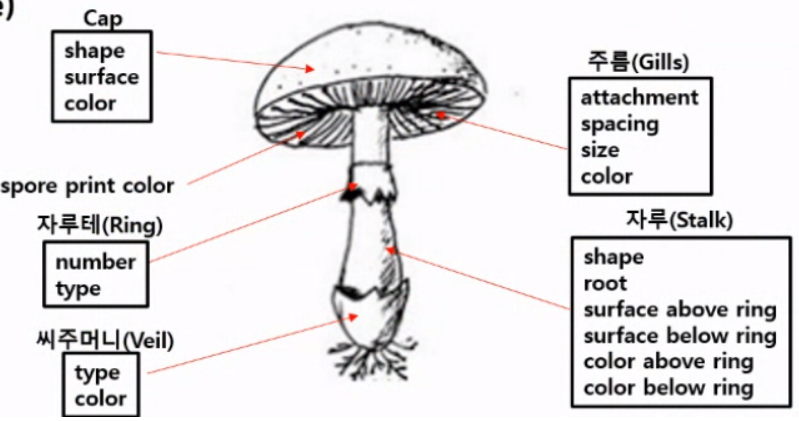
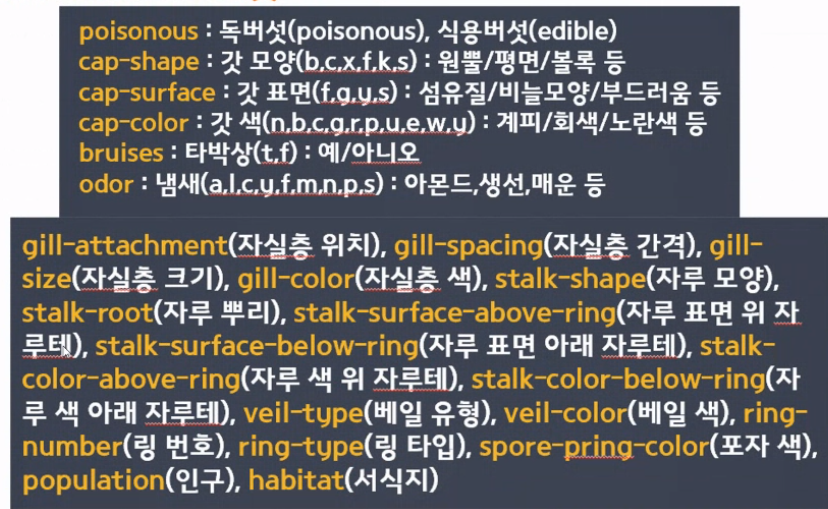

In [2]:
import pandas as pd

mushroom = pd.read_csv('data/mushroom.csv')
print(mushroom.head())

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         

# 2. 탐색적 데이터 분석

In [3]:
# 데이터 형태
print(mushroom.shape)

(8124, 23)


In [4]:
# 결측치 확인
mushroom.info()

#Dtype이 전부 object형 >> 범주형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# 특성 데이터와 라벨 데이터로 분리
y = mushroom.iloc[:,0]
X = mushroom.iloc[:, 1:]

# X = mushroom.loc[:, 'cap-shape':]
# y = mushroom.loc[:, 'poisonous']

In [6]:
# 범주형 데이터 : .unique() , .value_counts() 를 사용하자!!
# 라벨 데이터의 클래스 확인
print(y.unique())

['p' 'e']


In [7]:
# 라벨 데이터의 클래스의 데이터 수
# 한 쪽 라벨만 많을 시에는, (예를 들어 독버섯 데이터만 많은 데이터), 다른쪽 라벨을 판별할 수 없기 때문에 데이터 라벨이 편향되면 X
print(y.value_counts())

e    4208
p    3916
Name: poisonous, dtype: int64


<AxesSubplot:xlabel='cap-shape', ylabel='count'>

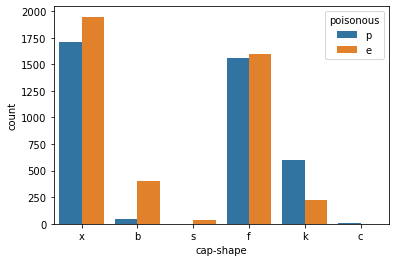

In [8]:
# barplot()
import seaborn as sb

# 범주형 데이터는 통합시, 데이터가 많은 쪽에 통합해야 함
# x : x축값, hue : 색상(x축 값마다의 막대 그래프의 개수)
sb.countplot(data = mushroom, x = 'cap-shape', hue = y)

# 3. 데이터 전처리
- 인코딩(encoding) : 범주형 데이터를 수치형 데이터로 변환하는 것
    - 계산하기 위해
    - 라벨(label) 인코딩 : 범주형을 정수로 변환
        - 크기 특성이 없는 데이터에 크기를 갖는 숫자를 부여하는 문제
    - one hot encoding : 범주형을 이진수로 변환
        - 크기 특성이 없는 데이터에 크기가 없는 숫자를 부여할 수 있음
        - 특성을 늘려주는 효과가 있음

- one hot encoding 방법
    - 과목 : 국어, 수학, 과학  -> 과학(001), 국어(010), 수학(100) 
    - 각 비트에 해당하는 새로운 칼럼을 생성 (데이터 개수 만큼 컬럼이 늘어남)
    - 새로운 컬럼의 순서는 클래스 값을 오름차순 정렬을 한 후에 순서대로 생성
    - 해당 클래스인 경우에만 1이고 그렇지 않으면 0인 컬럼을 생성
    - 모두 동일하게 1을 하나씩 갖고 있으므로 크기의 영향을 전혀 받지 않음
    -
    - pandas에서 원핫인코딩을 위한 함수를 제공 : get_dummies()
        - 원핫인코딩에 해당하는 컬럼을 생성하고 기존 컬럼은 삭제

### 원핫인코딩의 장점
- 새로운 특성을 늘려주는 효과 >> 과소적합 감소
- 크기를 갖지 않는 범주형 데이터에 크기를 갖지 않는 수치형으로 변환

In [9]:
import pandas as pd

data = pd.DataFrame({'산이름' : ['백두산', '한라산', '무등산']})

data

산이름
0  백두산
1  한라산
2  무등산

In [10]:
# 특성 개수를 늘리는 효과가 있음(1개 >> 3개)
# 범주형 데이터 값을 칼럼(특성)으로 만드는 것!
one_hot = pd.get_dummies(data['산이름'])

one_hot

무등산  백두산  한라산
0    0    1    0
1    0    0    1
2    1    0    0

In [11]:
# mushroom 데이터를 원핫인코딩

# 데이터에 대입해버리면 원본 데이터가 사라지기 때문에 가능하면 .copy()해서 쓰자!
X2 = X.copy()

one_hot_x = pd.get_dummies(X2)
one_hot_x.head()

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1             0             0          0          0   
1  ...             0             0             0          0          1   
2  ...             0             0             0          0          0   
3  ...             1             0             0          0          0   
4  ...             0             0             0          0          1   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  

[5 rows x 117 columns]

In [12]:
# 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

# test_size = 0.3 : 테스트 데이터 비율을 30%로 설정
# random_state : 범위 0 ~ 4294967295
X_train, X_test, y_train, y_test = train_test_split(one_hot_x, y , random_state = 999, test_size = 0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5686, 117), (2438, 117), (5686,), (2438,))

# 4. 모델 학습

In [13]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
print('훈련 정확도 : ', model_dt.score(X_train, y_train))
print('테스트 정확도 : ', model_dt.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  1.0


## 5. 트리 시각화하기

In [15]:
!pip install graphviz

- 윈도우용 graphviz 패키지 설치
    - https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/
    - 2개 중에 exe 파일(아래 거) 다운

In [16]:
# path 설정
import os

#C:\Program Files\Graphviz\bin 의 \(역슬래쉬)를 /로 바꾸자!!
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [17]:
# 만든 트리 정보를 저장
from sklearn.tree import export_graphviz

# export_graphviz(
#     사용할 모델, out_file = 파일명, 
#     class_names = [라벨명], 
#     feature_names = 특성 이름(칼럼명), 
#     impurity = 저장여부,
#     filled = 라벨 색칠 여부(기본값:흰색),
#     rounded = 둥근 사각형 사용 여부
#     )
export_graphviz(
    model_dt, out_file = 'data/tree.dot', 
    class_names = ['독', '식용'], 
    feature_names = one_hot_x.columns, 
    impurity = True,
    filled = True,
    rounded = True
)

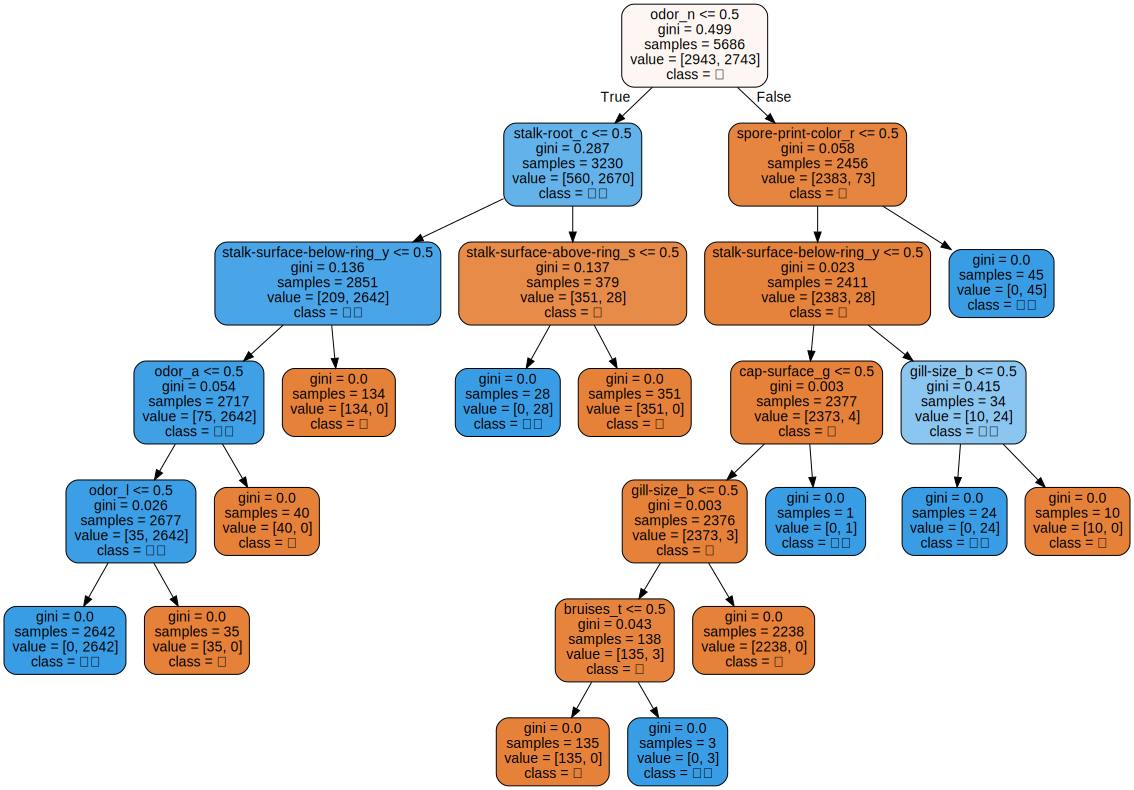

In [18]:
import graphviz

# with : 파일을 열었으면 반드시 닫아주어야 하는데 이것을 자동으로 닫아줌
# open() : 파일을 읽거나 쓰기 위해서 여는 것
# encoding = 'UTF-8' : 한글 인코딩
with open('data/tree.dot', encoding = 'UTF8') as f :
    # 파일 읽기
    dot_graph = f.read()
    
# 그래프 출력
display(graphviz.Source(dot_graph))

## 사전 가지치기(pre_prunning)
- 트리의 복잡도를 감소시켜서 과대적합을 줄여주는 방법
- 종류
    - max_depth : 트리의 층을 제한
    - max_leaf_nodes : leaf node의 수를 제한
    - min_samples_split : 노드를 분리하는 최소 데이터의 수를 설정

## max_depth를 이용한 사전 가지 치기
- 결정 트리의 최대 깊이
- 값이 클수록 복잡도가 올라간다.

In [19]:
# 위에서 부터 세로 층을 제어
model_dt2 = DecisionTreeClassifier(max_depth = 3)
model_dt2.fit(X_train, y_train)

print('훈련 정확도 : ', model_dt2.score(X_train, y_train))
print('테스트 정확도 : ', model_dt2.score(X_test, y_test))

훈련 정확도 :  0.9843475202251143
테스트 정확도 :  0.9872846595570139


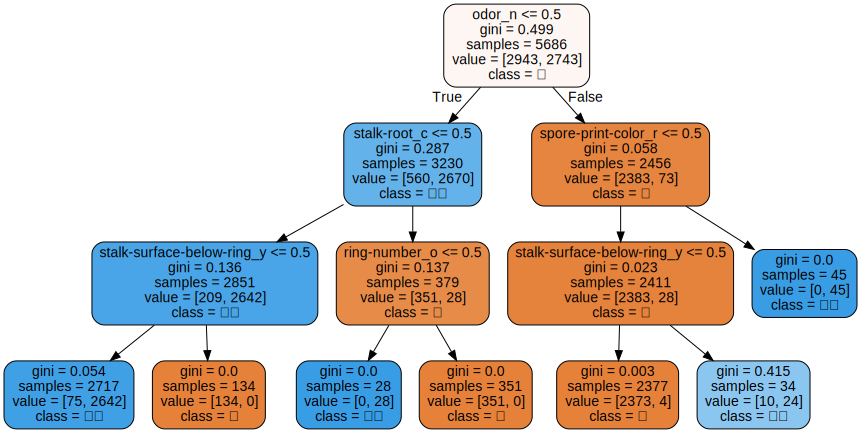

In [20]:
export_graphviz(
    model_dt2, out_file = 'data/tree2.dot', 
    class_names = ['독', '식용'], 
    feature_names = one_hot_x.columns, 
    impurity = True,
    filled = True,
    rounded = True
)

with open('data/tree2.dot', encoding = 'UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))
# 결정 트리의 samples 값을 보면 모두 3000이 넘은 것만 쪼개져 나왔음을 알 수 있다.

## max_leaf_nodes를 이용한 가지치기
- 리프 노드의 최대 갯수

In [21]:
model_dt3 = DecisionTreeClassifier(max_leaf_nodes = 5)
model_dt3.fit(X_train, y_train)

print('훈련 정확도 : ', model_dt3.score(X_train, y_train))
print('테스트 정확도 : ', model_dt3.score(X_test, y_test))

훈련 정확도 :  0.9769609567358424
테스트 정확도 :  0.9799015586546349


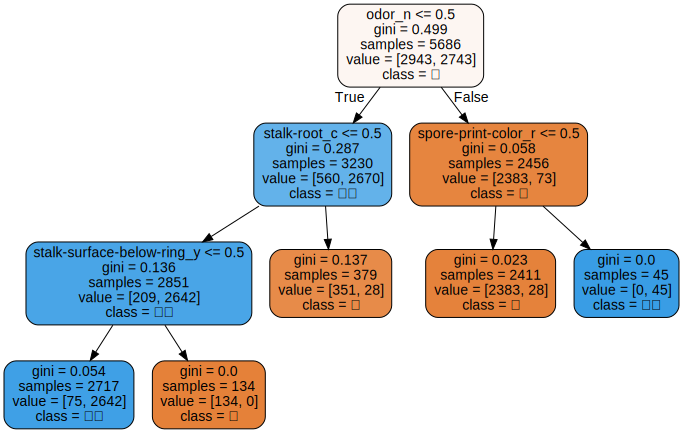

In [22]:
export_graphviz(
    model_dt3, out_file = 'data/tree3.dot', 
    class_names = ['독', '식용'], 
    feature_names = one_hot_x.columns, 
    impurity = True,
    filled = True,
    rounded = True
)

with open('data/tree3.dot', encoding = 'UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

## min_samples_split을 이용한 가지 치기
- 리프 노드로 분리 가능한 최소 샘플의 개수
- 제일 무난하게 잘 사용할 수 있는 함수

In [23]:
model_dt4 = DecisionTreeClassifier(min_samples_split = 3000)
model_dt4.fit(X_train, y_train)

print('훈련 정확도 : ', model_dt4.score(X_train, y_train))
print('테스트 정확도 : ', model_dt4.score(X_test, y_test))

훈련 정확도 :  0.9454801266268027
테스트 정확도 :  0.9450369155045119


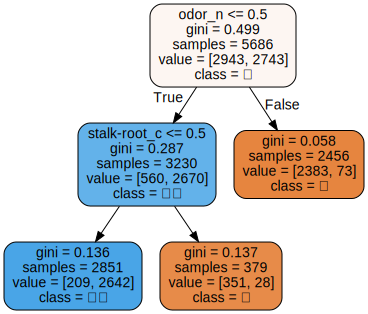

In [24]:
export_graphviz(
    model_dt4, out_file = 'data/tree4.dot', 
    class_names = ['독', '식용'], 
    feature_names = one_hot_x.columns, 
    impurity = True,
    filled = True,
    rounded = True
)

with open('data/tree4.dot', encoding = 'UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# 교차 검증(Cross Validation)
- 데이터 셋을 여러개 형태로 만들어 훈련시킨 후, 정확도를 평균내는 방법
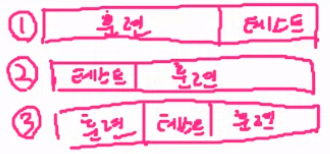

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

# cross_val_score(결정트리 모델, 특성 데이터, 라벨 데이터, cv = 데이터 셋 개수)
# 만든 Decision Tree의 점수를 측정해 볼 수 있다.
score = cross_val_score(model_dt, X_test, y_test, cv = 5)
print('교차 검증 점수 : ', score)
print('최종 점수 : ', np.mean(score))

교차 검증 점수 :  [1.         1.         0.99795082 1.         1.        ]
최종 점수 :  0.9995901639344262


# 정규화
- 편향된 데이터를 정규 분포로 만드는 작업
- 모델의 성능을 향상

In [26]:
data = pd.read_csv('data/data_skew.csv')
data.head()

0   1   2         y
0  56  18  27  2.926144
1  81  57   3  4.744364
2  25   9  11  1.439488
3  20  13  30  0.569621
4  27  13  13  1.230924

In [27]:
X = data.iloc[:,:3]
y = data.iloc[:,3:]
X.iloc[:, 1].value_counts()[9]

36

In [28]:
X.iloc[:, 1].skew()
# 양수 >> data의 1번 인덱스 데이터는 왼쪽으로 많이 치우쳐 있는 데이터

4.096528128036276

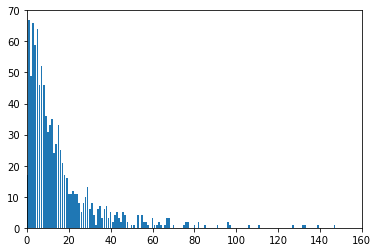

In [29]:
import matplotlib.pyplot as plt

plt.xlim(0, 160)
plt.ylim(0, 70)

# X 데이터의 1번 인덱스의 값들의 개수를 저장
bins = np.bincount(X.iloc[:, 1])
# x축 : 값들의 종류를 표시 / y축 : 값(개수)
plt.bar(range(len(bins)), bins)
plt.show()
# 포아송 분포를 확인할 수 있다.

- 위의 치우친 데이터를 학습시킨 것과 정규화를 시킨 데이터를 비교해 보자!

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 555)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)

pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)
print('훈련 오차 : ', mean_squared_error(pred_train, y_train))
print('테스트 오차 : ', mean_squared_error(pred_test,y_test))

훈련 오차 :  0.3094569314428629
테스트 오차 :  0.567002986324778


In [32]:
# 정규 분포로 만들기
# 왼쪽을 편향되어 있으면 log()를 오른쪽으로 편향되어 있으면 exp()를 사용
# log() 안의 값에 1을 더하는 이유: 0에 가까워지면 음의 무한대(inf)가 되기 때문에 이를 방지하기 위한 것
# 이후에도 갑자기 1을 더해주는 경우 log값이 무한대로 가는 것을 방지하기 위한 것이다.
X_train2 = np.log(X_train + 1)
X_test2 = np.log(X_test + 1)

In [33]:
X_train2.iloc[:, 0].skew()
# 약간 오른쪽으로 치우쳐 있으나 이정도는 괜찮음

-0.10017324773414837

(array([18.,  0.,  0., 28.,  0., 52.,  0., 32., 54., 81., 41., 52., 82.,
        34., 73., 58., 40., 31., 14., 23., 13., 11.,  6.,  4.,  3.]),
 array([0.        , 0.1979504 , 0.39590079, 0.59385119, 0.79180158,
        0.98975198, 1.18770237, 1.38565277, 1.58360316, 1.78155356,
        1.97950396, 2.17745435, 2.37540475, 2.57335514, 2.77130554,
        2.96925593, 3.16720633, 3.36515673, 3.56310712, 3.76105752,
        3.95900791, 4.15695831, 4.3549087 , 4.5528591 , 4.75080949,
        4.94875989]),
 <BarContainer object of 25 artists>)

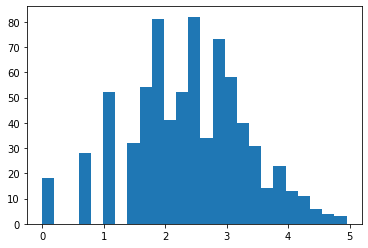

In [34]:
plt.hist(X_train2.iloc[:,0], bins = 25)

In [35]:
# 거리기반 모델(KNN, SUV? 등)은 정규화, 분산을 줄여주는 것이 필수!!(정확도가 올라감)
# 너무 많은 데이터는 쪼개거나
# 적은 데이터는 잘라서 많은 곳에 합해도 됨
knn_model.fit(X_train2, y_train)

pred_train = knn_model.predict(X_train2)
pred_test = knn_model.predict(X_test2)
print('훈련 오차 : ', mean_squared_error(pred_train, y_train))
print('테스트 오차 : ', mean_squared_error(pred_test,y_test))

훈련 오차 :  0.2229992835570005
테스트 오차 :  0.42957401642689336
